# Importing libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import datetime

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
indicators16 = pd.read_csv("../Data/Clean/indicators2016.csv")
indicators17 = pd.read_csv("../Data/Clean/indicators2017.csv")
indicators18 = pd.read_csv("../Data/Clean/indicators2018.csv")
indicators19 = pd.read_csv("../Data/Clean/indicators2019.csv")
indicators20 = pd.read_csv("../Data/Clean/indicators2020.csv")

In [3]:
# Setting country as index in order to scale the data
indicators16.set_index("countryname", inplace=True)
indicators17.set_index("country", inplace=True)
indicators18.set_index("country", inplace=True)
indicators19.set_index("Country", inplace=True)
indicators20.set_index("Country", inplace=True)

# Scaling the data

In order to perform analysis, data needs to be scaled while preserving the variance between the indicators. This can be done with the `MinMaxScaler` from `Scikitlearn` library. Rescaling is usually very sensitive to the choice of limits and extreme values (outliers) at both tails of the distribution. Each indicator distribution is censored, so that all values exceeding the upper bound score 100, and values below the lower bound score 0.

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1,100)) # Initializing the scaler and setting the range from 1 to 100

#Scaling 2016 df
indicators16 = pd.DataFrame(scaler.fit_transform(indicators16),columns = indicators16.columns, index=indicators16.index)

#Scaling 2017 df
indicators17 = indicators17.replace("n.d.", np.nan) # Transforming the n.d. values to NaN
indicators17 = pd.DataFrame(scaler.fit_transform(indicators17),columns = indicators17.columns, index=indicators17.index)

#Scaling the 2018 df
indicators18 = pd.DataFrame(scaler.fit_transform(indicators18),columns = indicators18.columns, index=indicators18.index)

#Scaling the 2019 df
indicators19 = pd.DataFrame(scaler.fit_transform(indicators19),columns = indicators19.columns, index=indicators19.index)

#Scaling the 2020 df
indicators20 = pd.DataFrame(scaler.fit_transform(indicators20),columns = indicators20.columns, index=indicators20.index)

## Dealing with ascending and descending variables

In a few cases, indicator and criteria point in opposite directions. For example, a high under-five mortality rate signifies a low (rather than high) level of human assets.

In [5]:
# Ascendent is more value better, descendent is less value better
descendent = ['sdg1_wpc', 'sdg1_320pov', 'sdg1_oecdpov', 'sdg2_undernsh', 'sdg2_stunting', 'sdg2_wasting', 
              'sdg2_obesity', 'sdg2_trophic', 'sdg2_snmi', 'sdg3_matmort', 'sdg3_neonat', 'sdg3_u5mort', 
              'sdg3_tb','sdg3_hiv', 'sdg3_ncds', 'sdg3_pollmort', 'sdg3_traffic','sdg17_cohaven', 'sdg16_prison',
              'sdg16_homicides', 'sdg16_clabor', 'sdg16_weaponsexp', 'sdg3_fertility', 'sdg3_region', 'sdg3_smoke',
              'sdg3_incomeg', 'sdg4_socioec', 'sdg4_science', 'sdg5_familypl', 'sdg5_paygap', 'sdg5_unpaid', 'sdg7_co2twh',
              'sdg8_unemp', 'sdg8_impacc', 'sdg8_yneet', 'sdg10_adjgini', 'sdg10_palma', 'sdg10_elder', 'sdg11_pm25', 
              'sdg11_rentover', 'sdg12_msw', 'sdg12_ewaste', 'sdg12_so2prod', 'sdg12_so2import', 'sdg12_prodnitro', 
              'sdg12_reacnitro', 'sdg12_mswrecycl', 'sdg13_co2pc', 'sdg13_co2import', 'sdg13_co2export', 'sdg14_fishstocks',
              'sdg14_trawl', 'sdg15_forchg', 'sdg16_detain', 'sdg16_rsf', 'sdg17_secrecy', 'sdg6_scarcew', "sdg14_biomar",
              "sdg15_biofrwter", "sdg17_sprofit"]

Expressing all the indicators as ascendent:

In [6]:
# Defining a function to express all the indicators in an ascending or descending way

def indicator_ascendance(df):
    for i in df:
        if i in descendent:
            df[i] = 100 - df[i]
            
# Applying the function to all the years
indicator_ascendance(indicators16)
indicator_ascendance(indicators17)
indicator_ascendance(indicators18)
indicator_ascendance(indicators19)
indicator_ascendance(indicators20)

### Imputing the missing data with nearest neighbour imputation

In order to impute missing values, which are important to deal with when it comes to forecasting, a range of different models can be used, although a simple k-nearest neighbor (KNN) model has proven to be effective in experiments. The use of a KNN model to predict or fill missing values is referred to as “Nearest Neighbor Imputation” or “KNN imputation”. The `KNNImputer` function from the Scikit Learn library has been used.

In [7]:
#Defining the imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform', metric='nan_euclidean')

# transform the 2016 dataset
indicators16 = pd.DataFrame(imputer.fit_transform(indicators16),columns = indicators16.columns, index=indicators16.index)

# transform the 2017 dataset
indicators17 = pd.DataFrame(imputer.fit_transform(indicators17),columns = indicators17.columns, index=indicators17.index)

# transform the 2018 dataset
indicators18 = pd.DataFrame(imputer.fit_transform(indicators18),columns = indicators18.columns, index=indicators18.index)

# transform the dataset
indicators19 = pd.DataFrame(imputer.fit_transform(indicators19),columns = indicators19.columns, index=indicators19.index)

# transform the dataset
indicators20 = pd.DataFrame(imputer.fit_transform(indicators20),columns = indicators20.columns, index=indicators20.index)

# Calculating each goal score and ranking column

## 2016

In [8]:
# Calculating goal scores
indicators16["sdg1_score"] = indicators16[["sdg1_wpc","sdg1_oecdpov"]].mean(axis=1)
indicators16["sdg2_score"] = indicators16[['sdg2_crlyld', 'sdg2_snmi', 'sdg2_obesity','sdg2_stunting', 'sdg2_undernsh', 'sdg2_wasting']].mean(axis=1)
indicators16["sdg3_score"] = indicators16[['sdg3_fertility','sdg3_lifee', 'sdg3_matmort', 'sdg3_neonat', 'sdg3_phys', 'sdg3_smoke','sdg3_swb', 'sdg3_tb', 'sdg3_traffic', 'sdg3_u5mort', 'sdg3_vac']].mean(axis=1)
indicators16["sdg4_score"] = indicators16[['sdg4_literacy', 'sdg4_pisa', 'sdg4_primary', 'sdg4_schlyrs','sdg4_tertiary', 'sdg4_upsec']].mean(axis=1)
indicators16["sdg5_score"] = indicators16[['sdg5_contra', 'sdg5_edat', 'sdg5_lfpr','sdg5_parl', 'sdg5_paygap']].mean(axis=1)
indicators16["sdg6_score"] = indicators16[['sdg6_freshwat', 'sdg6_water','sdg6_sanita']].mean(axis=1)
indicators16["sdg7_score"] = indicators16[['sdg7_elecac', 'sdg7_cleanfuel','sdg7_ren', 'sdg8_adjgrowth']].mean(axis=1)
indicators16["sdg8_score"] = indicators16[['sdg8_adjgrowth', 'sdg8_atms', 'sdg8_clabor_im','sdg8_empop', 'sdg8_unemp', 'sdg8_yneet']].mean(axis=1)
indicators16["sdg9_score"] = indicators16[['sdg9_infrqual','sdg9_intuse', 'sdg9_lpi', 'sdg9_mobuse', 'sdg9_patents', 'sdg9_rdres','sdg9_rdres.1']].mean(axis=1)
indicators16["sdg10_score"] = indicators16[['sdg10_adjgini', 'sdg10_justice', 'sdg10_palma']].mean(axis=1)
indicators16["sdg11_score"] = indicators16[['sdg11_pipedwat', 'sdg11_pm25', 'sdg11_rooms']].mean(axis=1)
indicators16["sdg12_score"] = indicators16[['sdg12_msw','sdg12_mswrecycl', 'sdg12_wastewat']].mean(axis=1)
indicators16["sdg13_score"] = indicators16[['sdg13_ccvm', 'sdg13_co2pc']].mean(axis=1)
indicators16["sdg14_score"] = indicators16[['sdg14_biodiv', 'sdg14_cleanwat', 'sdg14_cpma', 'sdg14_fish','sdg14_fishstocks']].mean(axis=1)
indicators16["sdg15_score"] = indicators16[['sdg15_cpta', 'sdg15_forchg', 'sdg15_redlist']].mean(axis=1)
indicators16["sdg16_score"] = indicators16[['sdg16_cpi', 'sdg16_goveff', 'sdg16_homicides', 'sdg16_prison','sdg16_prs', 'sdg16_safe', 'sdg16_u5reg']].mean(axis=1)
indicators16["sdg17_score"] = indicators16[['sdg17_govrev','sdg17_govspd', 'sdg17_oda']].mean(axis=1)
indicators16["total_score"] = indicators16.mean(axis=1)

In [9]:
# Creating column with ranking
goal_scores16 = [col for col in indicators16.columns if col.endswith("_score")] #Selecting the scores columns

tups = indicators16[goal_scores16].sort_values(goal_scores16, ascending=False).apply(tuple, 1) 
f, i = pd.factorize(tups)
factorized = pd.Series(f + 1, tups.index)
indicators16 = indicators16.assign(rank=factorized)

In [10]:
# Placing the rank column at the beggining and ordering the countries by rank
cols16 = list(indicators16.columns)
cols16 = [cols16[-1]] + cols16[:-1]
indicators16 = indicators16[cols16]
indicators16 = indicators16.sort_values("rank").reset_index()

## 2017

In [11]:
# Calculating each goal score
indicators17["sdg1_score"] = indicators17["sdg1_wpc"].mean()
indicators17["sdg2_score"] = indicators17[['sdg2_crlyld', 'sdg2_snmi', 'sdg2_obesity', 'sdg2_stunting','sdg2_undernsh', 'sdg2_wasting']].mean(axis=1)
indicators17["sdg3_score"] = indicators17[['sdg3_births', 'sdg3_fertility','sdg3_lifee', 'sdg3_hiv', 'sdg3_matmort', 'sdg3_ncds', 'sdg3_neonat','sdg3_pollmort', 'sdg3_smoke', 'sdg3_swb', 'sdg3_tb', 'sdg3_traffic','sdg3_u5mort', 'sdg3_uhc', 'sdg3_vac']].mean(axis=1)
indicators17["sdg4_score"] = indicators17[['sdg4_literacy', 'sdg4_pisa','sdg4_primary', 'sdg4_schlyrs', 'sdg4_tertiary']].mean(axis=1)
indicators17["sdg5_score"] = indicators17[['sdg5_edat', 'sdg5_lfpr', 'sdg5_parl', 'sdg5_paygap']].mean(axis=1)
indicators17["sdg6_score"] = indicators17[['sdg6_freshwat','sdg6_scarcew', 'sdg6_sanita', 'sdg6_water', 'sdg6_wastewat']].mean(axis=1)
indicators17["sdg7_score"] = indicators17[['sdg7_co2twh','sdg7_elecac', 'sdg7_cleanfuel', 'sdg7_ren']].mean(axis=1)
indicators17["sdg8_score"] = indicators17[['sdg8_accounts','sdg8_adjgrowth', 'sdg8_empop', 'sdg8_unemp','sdg8_yneet']].mean(axis=1)
indicators17["sdg9_score"] = indicators17[['sdg9_infrqual', 'sdg9_intuse', 'sdg9_lpi', 'sdg9_mobuse','sdg9_patents', 'sdg9_articles', 'sdg9_qs', 'sdg9_rdex', 'sdg9_rdres']].mean(axis=1)
indicators17["sdg10_score"] = indicators17[['sdg10_adjgini', 'sdg10_justice', 'sdg10_palma']].mean(axis=1)
indicators17["sdg11_score"] = indicators17[['sdg11_pipedwat','sdg11_pm25', 'sdg11_rentover']].mean(axis=1)
indicators17["sdg12_score"] = indicators17[['sdg12_ewaste', 'sdg12_msw','sdg12_mswrecycl', 'sdg12_prodnitro', 'sdg12_so2prod','sdg12_reacnitro', 'sdg12_so2import']].mean(axis=1)
indicators17["sdg13_score"] = indicators17[['sdg13_ccvm','sdg13_co2import', 'sdg13_co2pc', 'sdg13_ecr']].mean(axis=1)
indicators17["sdg14_score"] = indicators17[['sdg14_biodiv','sdg14_cleanwat', 'sdg14_cpma', 'sdg14_fish', 'sdg14_fishstocks']].mean(axis=1)
indicators17["sdg15_score"] = indicators17[['sdg15_cpfa', 'sdg15_cpta', 'sdg15_forchg', 'sdg15_biofrwter','sdg15_redlist']].mean(axis=1)
indicators17["sdg16_score"] = indicators17[['sdg16_clabor','sdg16_cpi', 'sdg16_goveff', 'sdg16_homicides','sdg16_prison', 'sdg16_prs', 'sdg16_safe', 'sdg8_slavery','sdg16_u5reg', 'sdg16_weaponsexp']].mean(axis=1)
indicators17["sdg17_score"] = indicators17[['sdg17_govex', 'sdg17_govspd','sdg17_secrecy', 'sdg17_cohaven']].mean(axis=1)
indicators17["total_score"] = indicators17.mean(axis=1)

In [12]:
# Creating column with ranking
goal_scores17 = [col for col in indicators17.columns if col.endswith("_score")]

tups = indicators17[goal_scores17].sort_values(goal_scores17, ascending=False).apply(tuple, 1)
f, i = pd.factorize(tups)
factorized = pd.Series(f + 1, tups.index)
indicators17 = indicators17.assign(rank=factorized)

In [13]:
# Placing the rank column at the beggining
cols17 = list(indicators17.columns)
cols17 = [cols17[-1]] + cols17[:-1]
indicators17 = indicators17[cols17]
indicators17 = indicators17.sort_values("rank").reset_index()

## 2018

In [14]:
# Calculating each goal score
indicators18["sdg1_score"] = indicators18[['sdg1_wpc', 'sdg1_oecdpov']].mean(axis=1)
indicators18["sdg2_score"] = indicators18[['sdg2_undernsh', 'sdg2_stunting', 'sdg2_wasting', 'sdg2_obesity', 'sdg2_crlyld', 'sdg2_snmi']].mean(axis=1)
indicators18["sdg3_score"] = indicators18[['sdg3_matmort', 'sdg3_neonat', 'sdg3_u5mort', 'sdg3_tb', 'sdg3_hiv', 'sdg3_ncds', 'sdg3_pollmort', 'sdg3_traffic', 'sdg3_lifee', 'sdg3_fertility', 'sdg3_births', 'sdg3_vac', 'sdg3_uhc', 'sdg3_swb', 'sdg3_incomeg', 'sdg3_region', 'sdg3_smoke']].mean(axis=1)
indicators18["sdg4_score"] = indicators18[['sdg4_primary', 'sdg4_schlyrs', 'sdg4_literacy', 'sdg4_pisa', 'sdg4_resil', 'sdg4_science', 'sdg4_socioec', 'sdg4_tertiary']].mean(axis=1)
indicators18["sdg5_score"] = indicators18[['sdg5_paygap','sdg5_familypl', 'sdg5_edat', 'sdg5_lfpr', 'sdg5_parl']].mean(axis=1)
indicators18["sdg6_score"] = indicators18[['sdg6_safesan', 'Population using at least basic sanitation services (%)', 'sdg6_safewat', 'sdg6_water', 'sdg6_freshwat', 'sdg6_scarcew', 'sdg6_wastewat']].mean(axis=1)
indicators18["sdg7_score"] = indicators18[['sdg7_ren','sdg7_elecac', 'sdg7_cleanfuel', 'sdg7_co2twh']].mean(axis=1)
indicators18["sdg8_score"] = indicators18[['sdg8_empop', 'sdg8_yneet','sdg8_adjgrowth', 'sdg8_slavery', 'sdg8_accounts', 'sdg8_unemp']].mean(axis=1)
indicators18["sdg9_score"] = indicators18[['sdg9_netacc', 'sdg9_patents', 'sdg9_rdres', 'sdg9_womensci', 'sdg9_intuse', 'sdg9_mobuse', 'sdg9_infrqual', 'sdg9_lpi', 'sdg9_qs', 'sdg9_articles', 'sdg9_rdex']].mean(axis=1)
indicators18["sdg10_score"] = indicators18[['sdg10_elder', 'sdg10_palma','sdg10_adjgini', ]].mean(axis=1)
indicators18["sdg11_score"] = indicators18[['sdg11_rentover','sdg11_pm25', 'sdg11_pipedwat', 'sdg11_transport', ]].mean(axis=1)
indicators18["sdg12_score"] = indicators18[['sdg12_mswrecycl','sdg12_msw', 'sdg12_ewaste', 'sdg12_so2prod', 'sdg12_so2import', 'sdg12_prodnitro', 'sdg12_reacnitro']].mean(axis=1)
indicators18["sdg13_score"] = indicators18[['sdg13_ecr','sdg13_co2pc', 'sdg13_co2import', 'sdg13_ccvm', 'sdg13_co2export']].mean(axis=1)
indicators18["sdg14_score"] = indicators18[['sdg14_cpma', 'sdg14_biodiv', 'sdg14_cleanwat', 'sdg14_fish', 'sdg14_fishstocks', 'sdg14_trawl']].mean(axis=1)
indicators18["sdg15_score"] = indicators18[['sdg15_cpta', 'sdg15_cpfa', 'sdg15_redlist', 'sdg15_forchg', 'sdg15_biofrwter']].mean(axis=1)
indicators18["sdg16_score"] = indicators18[['sdg16_homicides', 'sdg16_prison', 'sdg16_safe', 'sdg16_goveff', 'sdg16_prs', 'sdg16_u5reg', 'sdg16_cpi', 'sdg16_clabor', 'sdg16_weaponsexp']].mean(axis=1)
indicators18["sdg17_score"] = indicators18[['sdg17_secrecy','sdg17_govex', 'sdg17_govspd', 'sdg17_govrev', 'sdg17_cohaven']].mean(axis=1)
indicators18["total_score"] = indicators18.mean(axis=1)

In [15]:
# Creating column with ranking
goal_scores18 = [col for col in indicators18.columns if col.endswith("_score")]

tups = indicators18[goal_scores18].sort_values(goal_scores18, ascending=False).apply(tuple, 1)
f, i = pd.factorize(tups)
factorized = pd.Series(f + 1, tups.index)
indicators18 = indicators18.assign(rank=factorized)

In [16]:
# Placing the rank column at the beggining
cols18 = list(indicators18.columns)
cols18 = [cols18[-1]] + cols18[:-1]
indicators18 = indicators18[cols18]
indicators18 = indicators18.sort_values("rank").reset_index()

## 2019

In [17]:
# Calculating each goal score
indicators19["sdg1_score"] = indicators19[['sdg1_wpc', 'sdg1_320pov', 'sdg1_oecdpov']].mean(axis=1)
indicators19["sdg2_score"] = indicators19[['sdg2_undernsh', 'sdg2_stunting', 'sdg2_wasting', 'sdg2_obesity', 'sdg2_crlyld', 'sdg2_snmi', 'sdg2_yieldgap', 'sdg2_trophic']].mean(axis=1)
indicators19["sdg3_score"] = indicators19[['sdg3_matmort', 'sdg3_neonat', 'sdg3_u5mort', 'sdg3_tb', 'sdg3_hiv', 'sdg3_ncds', 'sdg3_pollmort', 'sdg3_traffic', 'sdg3_lifee', 'sdg3_fertility', 'sdg3_births', 'sdg3_vac', 'sdg3_uhc', 'sdg3_swb', 'sdg3_region', 'sdg3_incomeg', 'sdg3_smoke']].mean(axis=1)
indicators19["sdg4_score"] = indicators19[['sdg4_primary', 'sdg4_second', 'sdg4_literacy', 'sdg4_earlyedu', 'sdg4_tertiary', 'sdg4_pisa', 'sdg4_socioec', 'sdg4_science', 'sdg4_resil']].mean(axis=1)
indicators19["sdg5_score"] = indicators19[['sdg5_familypl', 'sdg5_edat', 'sdg5_lfpr', 'sdg5_parl', 'sdg5_paygap', 'sdg5_unpaid']].mean(axis=1)
indicators19["sdg6_score"] = indicators19[['sdg6_water', 'sdg6_sanita', 'sdg6_freshwat', 'sdg6_scarcew', 'sdg6_wastewat', 'sdg6_safewat', 'sdg6_safesan']].mean(axis=1)
indicators19["sdg7_score"] = indicators19[['sdg7_elecac', 'sdg7_cleanfuel', 'sdg7_co2twh', 'sdg7_ren']].mean(axis=1)
indicators19["sdg8_score"] = indicators19[['sdg8_adjgrowth', 'sdg8_slavery', 'sdg8_accounts', 'sdg8_unemp', 'sdg8_impacc', 'sdg8_empop', 'sdg8_yneet']].mean(axis=1)
indicators19["sdg9_score"] = indicators19[['sdg9_intuse', 'sdg9_mobuse', 'sdg9_lpi', 'sdg9_qs', 'sdg9_articles', 'sdg9_rdex', 'sdg9_rdres', 'sdg9_patents', 'sdg9_netacc', 'sdg9_womensci']].mean(axis=1)
indicators19["sdg10_score"] = indicators19[['sdg10_adjgini', 'sdg10_palma', 'sdg10_elder']].mean(axis=1)
indicators19["sdg11_score"] = indicators19[['sdg11_pm25', 'sdg11_pipedwat', 'sdg11_transport', 'sdg11_rentover']].mean(axis=1)
indicators19["sdg12_score"] = indicators19[['sdg12_msw', 'sdg12_ewaste', 'sdg12_so2prod', 'sdg12_so2import', 'sdg12_prodnitro', 'sdg12_reacnitro', 'sdg12_mswrecycl']].mean(axis=1)
indicators19["sdg13_score"] = indicators19[['sdg13_co2pc', 'sdg13_co2import', 'sdg13_co2export', 'sdg13_ecr']].mean(axis=1)
indicators19["sdg14_score"] = indicators19[['sdg14_cpma', 'sdg14_cleanwat', 'sdg14_fishstocks', 'sdg14_trawl']].mean(axis=1)
indicators19["sdg15_score"] = indicators19[['sdg15_cpta', 'sdg15_cpfa', 'sdg15_redlist', 'sdg15_forchg', 'sdg15_biofrwter']].mean(axis=1)
indicators19["sdg16_score"] = indicators19[['sdg16_homicides', 'sdg16_detain', 'sdg16_safe', 'sdg16_prs', 'sdg16_u5reg', 'sdg16_cpi', 'sdg16_clabor', 'sdg16_weaponsexp', 'sdg16_rsf', 'sdg16_prison']].mean(axis=1)
indicators19["sdg17_score"] = indicators19[['sdg17_govex', 'sdg17_oda', 'sdg17_govrev', 'sdg17_cohaven', 'sdg17_secrecy']].mean(axis=1)
indicators19["total_score"] = indicators19.mean(axis=1)

In [18]:
# Creating column with ranking
goal_scores19 = [col for col in indicators18.columns if col.endswith("_score")]

tups = indicators19[goal_scores19].sort_values(goal_scores19, ascending=False).apply(tuple, 1)
f, i = pd.factorize(tups)
factorized = pd.Series(f + 1, tups.index)
indicators19 = indicators19.assign(rank=factorized)

In [19]:
# Placing the rank column at the beggining
cols19 = list(indicators19.columns)
cols19 = [cols19[-1]] + cols19[:-1]
indicators19 = indicators19[cols19]
indicators19 = indicators19.sort_values("rank").reset_index()

## 2020

In [20]:
# Calculating each goal score
indicators20["sdg1_score"] = indicators20[['sdg1_wpc', 'sdg1_320pov', 'sdg1_oecdpov']].mean(axis=1)
indicators20["sdg2_score"] = indicators20[['sdg2_undernsh', 'sdg2_stunting', 'sdg2_wasting', 'sdg2_obesity', 'sdg2_trophic', 'sdg2_crlyld', 'sdg2_snmi', 'sdg2_yieldgap']].mean(axis=1)
indicators20["sdg3_score"] = indicators20[['sdg3_matmort', 'sdg3_neonat', 'sdg3_u5mort', 'sdg3_tb', 'sdg3_hiv', 'sdg3_ncds', 'sdg3_pollmort', 'sdg3_traffic', 'sdg3_lifee', 'sdg3_fertility', 'sdg3_births', 'sdg3_vac', 'sdg3_uhc', 'sdg3_swb', 'sdg3_region', 'sdg3_incomeg', 'sdg3_smoke']].mean(axis=1)
indicators20["sdg4_score"] = indicators20[['sdg4_primary', 'sdg4_second', 'sdg4_literacy', 'sdg4_earlyedu', 'sdg4_tertiary', 'sdg4_pisa', 'sdg4_socioec', 'sdg4_science', 'sdg4_resil']].mean(axis=1)
indicators20["sdg5_score"] = indicators20[['sdg5_familypl', 'sdg5_edat', 'sdg5_lfpr', 'sdg5_parl', 'sdg5_paygap', 'sdg5_unpaid']].mean(axis=1)
indicators20["sdg6_score"] = indicators20[['sdg6_water', 'sdg6_sanita', 'sdg6_freshwat', 'sdg6_wastewat', 'sdg6_scarcew', 'sdg6_safewat', 'sdg6_safesan']].mean(axis=1)
indicators20["sdg7_score"] = indicators20[['sdg7_elecac', 'sdg7_cleanfuel', 'sdg7_co2twh', 'sdg7_ren']].mean(axis=1)
indicators20["sdg8_score"] = indicators20[['sdg8_adjgrowth', 'sdg8_slavery', 'sdg8_accounts', 'sdg8_unemp', 'sdg8_impacc', 'sdg8_empop', 'sdg8_yneet']].mean(axis=1)
indicators20["sdg9_score"] = indicators20[['sdg9_intuse', 'sdg9_mobuse', 'sdg9_lpi', 'sdg9_qs', 'sdg9_articles', 'sdg9_rdex', 'sdg9_rdres', 'sdg9_patents', 'sdg9_netacc', 'sdg9_womensci']].mean(axis=1)
indicators20["sdg10_score"] = indicators20[['sdg10_adjgini', 'sdg10_palma', 'sdg10_elder']].mean(axis=1)
indicators20["sdg11_score"] = indicators20[['sdg11_pm25', 'sdg11_pipedwat', 'sdg11_transport', 'sdg11_rentover']].mean(axis=1)
indicators20["sdg12_score"] = indicators20[['sdg12_msw', 'sdg12_ewaste', 'sdg12_so2prod', 'sdg12_so2import', 'sdg12_prodnitro', 'sdg12_reacnitro', 'sdg12_mswrecycl']].mean(axis=1)
indicators20["sdg13_score"] = indicators20[['sdg13_co2pc', 'sdg13_co2import', 'sdg13_co2export', 'sdg13_ecr']].mean(axis=1)
indicators20["sdg14_score"] = indicators20[['sdg14_cpma', 'sdg14_cleanwat', 'sdg14_fishstocks', 'sdg14_trawl', 'sdg14_biomar']].mean(axis=1)
indicators20["sdg15_score"] = indicators20[['sdg15_cpta', 'sdg15_cpfa', 'sdg15_redlist', 'sdg15_forchg', 'sdg15_biofrwter']].mean(axis=1)
indicators20["sdg16_score"] = indicators20[['sdg16_homicides', 'sdg16_detain', 'sdg16_safe', 'sdg16_prs', 'sdg16_u5reg', 'sdg16_cpi', 'sdg16_clabor', 'sdg16_weaponsexp', 'sdg16_rsf', 'sdg16_prison']].mean(axis=1)
indicators20["sdg17_score"] = indicators20[['sdg17_govex', 'sdg17_oda', 'sdg17_govrev', 'sdg17_cohaven', 'sdg17_secrecy', 'sdg17_sprofit']].mean(axis=1)
indicators20["total_score"] = indicators20.mean(axis=1)

In [21]:
# Creating column with ranking
goal_scores20 = [col for col in indicators20.columns if col.endswith("_score")]

tups = indicators20[goal_scores20].sort_values(goal_scores20, ascending=False).apply(tuple, 1)
f, i = pd.factorize(tups)
factorized = pd.Series(f + 1, tups.index)
indicators20 = indicators20.assign(rank=factorized)

In [22]:
# Placing the rank column at the beggining
cols20 = list(indicators20.columns)
cols20 = [cols20[-1]] + cols20[:-1]
indicators20 = indicators20[cols20]
indicators20 = indicators20.sort_values("rank").reset_index()

## Creating summary tables with goal score and rank for each year

### 2016

In [23]:
#Selecting the columns to keep (scores, countryname and rank)
cols16 = [col for col in indicators16.columns if col.startswith("countryname") | 
          col.startswith("rank") | col.endswith("_score")]

# Creating subset of the df
df16 = indicators16[cols16].copy()

### 2017

In [24]:
#Selecting the columns to keep (scores, countryname and rank)
cols17 = [col for col in indicators17.columns if col.startswith("country") | 
          col.startswith("rank") | col.endswith("_score")]

#Creating subset of the df
df17 = indicators17[cols17].copy()

### 2018

In [25]:
#Selecting the columns to keep (scores, countryname and rank)
cols18 = [col for col in indicators18.columns if col.startswith("country") | 
          col.startswith("rank") | col.endswith("_score")]

df18 = indicators18[cols18].copy()

### 2019

In [26]:
#Selecting the columns to keep (scores, countryname and rank)
cols19 = [col for col in indicators19.columns if col.startswith("Country") | 
          col.startswith("rank") | col.endswith("_score")]

df19 = indicators19[cols19].copy()

### 2020

In [27]:
#Selecting the columns to keep (scores, countryname and rank)
cols20 = [col for col in indicators20.columns if col.startswith("Country") | 
          col.startswith("rank") | col.endswith("_score")]

df20 = indicators20[cols20].copy()

### Creating new dataframe with global total

In [28]:
#Selecting the total_score column for each year and calculating the global mean
data = [['2016', np.mean(df16["total_score"])], ['2017', np.mean(df17["total_score"])], 
        ['2018', np.mean(df18["total_score"])], ['2019', np.mean(df19["total_score"])], 
        ['2020', np.mean(df20["total_score"])]]

global_df = pd.DataFrame(data, columns = ['ds', 'y']) #Renaming the columns in order to perform forecasting
global_df

,ds,y
0,2016,54.772961
1,2017,59.382408
2,2018,59.228779
3,2019,59.546029
4,2020,61.425798


## Creating dataframe with Economies by per capita GNI groups by UN

In [29]:
high_income = ["Australia","Austria", "Bahrain", "Barbados","Belgium","Brunei Darussalam","Canada","Chile","Cyprus",
"Czech Republic","Denmark","Estonia","Finland","France","Germany","Greece","Hong Kong","Hungary","Iceland","Ireland",
"Israel","Italy","Japan","Kuwait","Latvia","Lithuania","Luxembourg","Malta","Netherlands","New Zealand","Norway","Oman",
"Poland","Portugal","Qatar","Korea, Rep.", "Korea, Dem. Rep.", "Saudi Arabia","Singapore","Slovak Republic","Slovenia","Spain","Sweden",
"Switzerland","Taiwan","Trinidad and Tobago","United Arab Emirates","United Kingdom","United States", "Uruguay"]

upper_middle_income = ["Albania","Algeria","Argentina","Azerbaijan","Belarus","Belize","Bosnia and Herzegovina","Botswana",
"Brazil","Bulgaria","China","Colombia","Costa Rica","Croatia","Cuba","Dominican Republic","Ecuador","Equatorial Guinea",
"Fiji","Gabon","Guyana","Iran, Islamic Rep.","Iraq","Jamaica","Kazakhstan","Lebanon","Libya","Malaysia","Maldives","Mauritius",
"Mexico","Montenegro","Namibia","Panama","Paraguay","Peru","Romania","Russian Federation","Samoa","Serbia",
"South Africa","Suriname","Thailand","Macedonia, FYR", "Former Yugoslav Republic of Macedonia (FYROM)","Turkey","Turkmenistan","Venezuela, RB"]

lower_middle_income = ["Angola","Armenia","Bangladesh","Bhutan","Bolivia","Cambodia","Cameroon","Cabo Verde","Congo, Dem. Rep.","Cote d'Ivoire",
"Djibouti","Egypt, Arab Rep.","El Salvador","Ghana","Georgia","Guatemala","Honduras","India","Indonesia","Jordan","Kenya",
"Kiribati","Kyrgyz Republic","Lao PDR","Lesotho","Mauritania","Mongolia","Morocco","Myanmar","Nicaragua","Nigeria",
"Pakistan","Papua New Guinea","Philippines","Moldova","São Tomé and Principe", "Sao Tome and Principe","Solomon Islands",
"Sri Lanka","Sudan","Swaziland","Syrian Arab Republic","Tajikistan","Timor-Leste","Tunisia","Ukraine",
"Uzbekistan","Vanuatu","Vietnam","Yemen, Rep.","Zambia"]

low_income = ["Afghanistan","Benin","Burkina Faso","Burundi","Central African Republic","Chad","Comoros","Congo, Rep.",
"Eritrea","Ethiopia","Gambia, The","Guinea","Guinea-Bissau","Haiti","Liberia","Madagascar","Malawi","Mali","Mozambique",
"Nepal","Niger","Rwanda","Senegal","Sierra Leone","Somalia","Togo","Uganda","Tanzania","Zimbabwe"]

values=['HI','UMI','LMI','LI']

In [30]:
# Labeling the countries in 2016 dataset
cond = [df16["countryname"].isin(high_income),df16['countryname'].isin(upper_middle_income),df16['countryname'].isin(lower_middle_income),df16['countryname'].isin(low_income)]
df16['economy']=np.select(cond,values)

In [31]:
# Labeling the countries in 2017 dataset
cond1=[df17['country'].isin(high_income),df17['country'].isin(upper_middle_income),df17['country'].isin(lower_middle_income),df17['country'].isin(low_income)]
df17['economy']=np.select(cond1,values)

In [32]:
# Labeling the countries in 2018 dataset
cond2=[df18['country'].isin(high_income),df18['country'].isin(upper_middle_income),df18['country'].isin(lower_middle_income),df18['country'].isin(low_income)]
df18['economy']=np.select(cond2,values)

In [33]:
# Labeling the countries in 2019 dataset
cond3=[df19['Country'].isin(high_income),df19['Country'].isin(upper_middle_income),df19['Country'].isin(lower_middle_income),df19['Country'].isin(low_income)]
df19['economy']=np.select(cond3,values)

In [34]:
# Labeling the countries in 2020 dataset
cond4=[df20['Country'].isin(high_income),df20['Country'].isin(upper_middle_income),df20['Country'].isin(lower_middle_income),df20['Country'].isin(low_income)]
df20['economy']=np.select(cond4,values)

### Creating dataframe for High income countries

In [35]:
data_hi = [['2016', df16[df16["economy"] == "HI"]["total_score"].median()], 
        ['2017', df17[df17["economy"] == "HI"]["total_score"].median()], 
        ['2018', df18[df18["economy"] == "HI"]["total_score"].median()], 
        ['2019', df19[df19["economy"] == "HI"]["total_score"].median()], 
        ['2020', df20[df20["economy"] == "HI"]["total_score"].median()]]
hi_df = pd.DataFrame(data_hi, columns = ['ds', 'score'])
hi_df['ds'] = pd.to_datetime(hi_df['ds'])

### Creating dataframe for upper middle income countries

In [36]:
data_umi = [['2016', df16[df16["economy"] == "UMI"]["total_score"].median()], 
        ['2017', df17[df17["economy"] == "UMI"]["total_score"].median()], 
        ['2018', df18[df18["economy"] == "UMI"]["total_score"].median()], 
        ['2019', df19[df19["economy"] == "UMI"]["total_score"].median()], 
        ['2020', df20[df20["economy"] == "UMI"]["total_score"].median()]]
umi_df = pd.DataFrame(data_umi, columns = ['ds', 'score']) 
umi_df['ds'] = pd.to_datetime(umi_df['ds'])

### Creating dataframe for lower middle income countries

In [37]:
data_lmi = [['2016', df16[df16["economy"] == "LMI"]["total_score"].median()], 
        ['2017', df17[df17["economy"] == "LMI"]["total_score"].median()], 
        ['2018', df18[df18["economy"] == "LMI"]["total_score"].median()], 
        ['2019', df19[df19["economy"] == "LMI"]["total_score"].median()], 
        ['2020', df20[df20["economy"] == "LMI"]["total_score"].median()]]
lmi_df = pd.DataFrame(data_lmi, columns = ['ds', 'score']) 
lmi_df['ds'] = pd.to_datetime(lmi_df['ds'])

### Creating dataframe for low income countries

In [38]:
data_li = [['2016', df16[df16["economy"] == "LI"]["total_score"].median()], 
        ['2017', df17[df17["economy"] == "LI"]["total_score"].median()], 
        ['2018', df18[df18["economy"] == "LI"]["total_score"].median()], 
        ['2019', df19[df19["economy"] == "LI"]["total_score"].median()], 
        ['2020', df20[df20["economy"] == "LI"]["total_score"].median()]]
li_df = pd.DataFrame(data_li, columns = ['ds', 'score']) 
li_df['ds'] = pd.to_datetime(li_df['ds'])

Plotting the economies performance

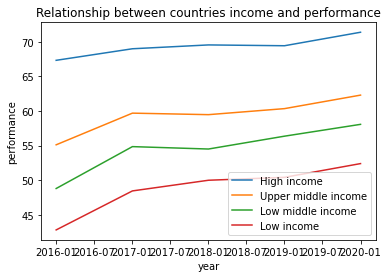

In [39]:
f, ax = plt.subplots(1, 1)
plt.plot("ds", "score", data=hi_df, label="High income")
plt.plot("ds", "score", data=umi_df, label="Upper middle income")
plt.plot("ds", "score", data=lmi_df, label="Low middle income")
plt.plot("ds", "score", data=li_df, label="Low income")
plt.title("Relationship between countries income and performance")
plt.xlabel("year")
plt.ylabel("performance")
ax.legend()

### Creating dataframe with regions

In [40]:
northern_africa = ["Algeria", "Egypt", "Egypt, Arab Rep.", "Libya", "Morocco", "Sudan", "Tunisia", "Western Sahara"]
eastern_africa = ["British Indian Ocean Territory", "Burundi", "Comoros", "Djibouti", "Eritrea", "Ethiopia", "French Southern Territories", "Kenya", "Madagascar", "Malawi", "Mauritius", "Mayotte", "Mozambique","Réunion", "Rwanda", "Seychelles", "Somalia", "South Sudan", "Uganda", "United Republic of Tanzania", "Tanzania", "Zambia", "Zimbabwe"]
middle_africa = ["Angola", "Cameroon", "Central African Republic", "Chad", "Congo, Dem. Rep.", "Congo, Rep.","Democratic Republic of the Congo", "Equatorial Guinea", "Gabon", "Sao Tome and Principe"]
southern_africa = ["Swaziland","Botswana", "Eswatini", "Lesotho", "Namibia", "South Africa"]
western_africa = ["Benin", "Burkina Faso", "Cabo Verde", "Côte d’Ivoire", "Cote d'Ivoire", "Gambia, The", "Ghana", "Guinea", "Guinea-Bissau","Liberia", "Mali", "Mauritania", "Niger", "Nigeria", "Saint Helena", "Senegal", "Sierra Leone", "Togo"]
latin_am_caribbean = ["Anguilla", "Antigua and Barbuda", "Aruba", "Bahamas", "Barbados", "Bonaire", "British Virgin Islands", "Cayman Islands", "Cuba", "Curaçao", "Dominica","Dominican Republic", "Grenada", "Guadeloupe", "Haiti", "Jamaica", "Martinique", "Montserrat","Puerto Rico", "Saint Barthélemy", "Saint Kitts and Nevis", "Saint Lucia", "Saint Martin (French Part)", "Saint Vincent and the Grenadines", "Samoa","Sint Maarten (Dutch part)", "Trinidad and Tobago","Turks and Caicos Islands", "United States Virgin Islands","Belize", "Costa Rica", "El Salvador", "Guatemala", "Honduras", "Mexico", "Nicaragua","Panama","Argentina", "Bolivia", "Bouvet Island", "Brazil", "Chile","Colombia", "Ecuador", "Falkland Islands (Malvinas)", "French Guiana", "Guyana", "Paraguay", "Peru","South Georgia and the South Sandwich Islands", "Suriname", "Uruguay", "Venezuela, RB", "Venezuela"]
north_america = ["Bermuda", "Canada", "Greenland", "Saint Pierre and Miquelon", "United States"]
central_asia = ["Kazakhstan", "Kyrgyzstan", "Kyrgyz Republic","Tajikistan", "Turkmenistan", "Uzbekistan"]
east_asia = ["China", "Hong Kong" , "Korea, Rep.", "Korea, Dem. Rep.", "Japan", "Mongolia"]
southeast_asia = ["Brunei Darussalam", "Cambodia", "Indonesia", "Lao PDR", "Malaysia","Myanmar", "Philippines", "Singapore", "Thailand", "Timor-Leste", "Vietnam"]
southern_asia = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Iran, Islamic Rep.", "Maldives", "Nepal","Pakistan", "Sri Lanka"]
western_asia = ["Armenia", "Azerbaijan", "Bahrain", "Cyprus", "Georgia", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon","Oman", "Qatar", "Saudi Arabia", "State of Palestine", "Syrian Arab Republic", "Turkey", "United Arab Emirates", "Yemen","Yemen, Rep."]
east_europe = ["Belarus", "Bulgaria", "Czech Republic", "Hungary", "Poland", "Republic of Moldova", "Moldova","Romania","Russian Federation", "Slovakia", "Slovak Republic", "Ukraine"]
north_europe = ["Åland Islands", "Channel Islands (Guernsey, Jersey, Sark)", "Denmark", "Estonia", "Faroe Islands","Finland", "Iceland", "Ireland", "Isle of Man", "Latvia", "Lithuania", "Norway", "Svalbard and Jan Mayen Islands", "Sweden", "United Kingdom", "Ireland"]
south_europe = ["Albania", "Andorra", "Bosnia and Herzegovina", "Croatia", "Gibraltar", "Greece", "Holy See", "Italy","Malta", "Montenegro", "Portugal", "San Marino", "Serbia", "Slovenia", "Spain", "Macedonia, FYR", "Former Yugoslav Republic of Macedonia (FYROM)"]
western_europe = ["Austria", "Belgium", "France", "Germany", "Liechtenstein", "Luxembourg", "Monaco", "Netherlands","Switzerland"]
oceania = ["Australia", "Christmas Island", "Cocos (Keeling) Islands", "Heard Island and McDonald Islands","New Zealand", "Norfolk Island", "Fiji", "New Caledonia", "Papua New Guinea", "Solomon Islands", "Vanuatu", "Guam", "Kiribati", "Marshall Islands", "Micronesia (Federated States of)", "Nauru", "Northern Mariana Islands", "Palau", "United States Minor Outlying Islands"]

values=['north_af','east_af','mid_af','south_af', "west_afr","lat_cab", "north_am", "cent_as", "east_as", "southeast_as", "south_as", "west_as", "east_eu", "nor_eu", "sou_eu", "wes_eu", "oceania"]

In [41]:
# Labeling the countries in 2016 dataset
cond=[df16["countryname"].isin(northern_africa),df16['countryname'].isin(eastern_africa),df16['countryname'].isin(middle_africa),df16['countryname'].isin(southern_africa),
     df16['countryname'].isin(western_africa), df16['countryname'].isin(latin_am_caribbean), df16['countryname'].isin(north_america),
     df16['countryname'].isin(central_asia), df16['countryname'].isin(east_asia), df16['countryname'].isin(southeast_asia), df16['countryname'].isin(southern_asia),
     df16['countryname'].isin(western_asia), df16['countryname'].isin(east_europe), df16['countryname'].isin(north_europe), df16['countryname'].isin(south_europe), 
     df16['countryname'].isin(western_europe), df16['countryname'].isin(oceania)]
df16['region']=np.select(cond,values)

In [42]:
# Labeling the countries in 2017 dataset
cond=[df17["country"].isin(northern_africa),df17['country'].isin(eastern_africa),df17['country'].isin(middle_africa),df17['country'].isin(southern_africa),
     df17['country'].isin(western_africa), df17['country'].isin(latin_am_caribbean), df17['country'].isin(north_america),
     df17['country'].isin(central_asia), df17['country'].isin(east_asia), df17['country'].isin(southeast_asia), df17['country'].isin(southern_asia),
     df17['country'].isin(western_asia), df17['country'].isin(east_europe), df17['country'].isin(north_europe), df17['country'].isin(south_europe), 
     df17['country'].isin(western_europe), df17['country'].isin(oceania)]
df17['region']=np.select(cond,values)

In [43]:
# Labeling the countries in 2018 dataset
cond=[df18["country"].isin(northern_africa),df18['country'].isin(eastern_africa),df18['country'].isin(middle_africa),df18['country'].isin(southern_africa),
     df18['country'].isin(western_africa), df18['country'].isin(latin_am_caribbean), df18['country'].isin(north_america),
     df18['country'].isin(central_asia), df18['country'].isin(east_asia), df18['country'].isin(southeast_asia), df18['country'].isin(southern_asia),
     df18['country'].isin(western_asia), df18['country'].isin(east_europe), df18['country'].isin(north_europe), df18['country'].isin(south_europe), 
     df18['country'].isin(western_europe), df18['country'].isin(oceania)]
df18['region']=np.select(cond,values)

In [44]:
# Labeling the countries in 2019 dataset
cond=[df19["Country"].isin(northern_africa),df19['Country'].isin(eastern_africa),df19['Country'].isin(middle_africa),df19['Country'].isin(southern_africa),
     df19['Country'].isin(western_africa), df19['Country'].isin(latin_am_caribbean), df19['Country'].isin(north_america),
     df19['Country'].isin(central_asia), df19['Country'].isin(east_asia), df19['Country'].isin(southeast_asia), df19['Country'].isin(southern_asia),
     df19['Country'].isin(western_asia), df19['Country'].isin(east_europe), df19['Country'].isin(north_europe), df19['Country'].isin(south_europe), 
     df19['Country'].isin(western_europe), df19['Country'].isin(oceania)]
df19['region']=np.select(cond,values)

In [45]:
cond=[df20["Country"].isin(northern_africa),df20['Country'].isin(eastern_africa),df20['Country'].isin(middle_africa),df20['Country'].isin(southern_africa),
     df20['Country'].isin(western_africa), df20['Country'].isin(latin_am_caribbean), df20['Country'].isin(north_america),
     df20['Country'].isin(central_asia), df20['Country'].isin(east_asia), df20['Country'].isin(southeast_asia), df20['Country'].isin(southern_asia),
     df20['Country'].isin(western_asia), df20['Country'].isin(east_europe), df20['Country'].isin(north_europe), df20['Country'].isin(south_europe), 
     df20['Country'].isin(western_europe), df20['Country'].isin(oceania)]
df20['region']=np.select(cond,values)

### Africa

Creating dataframe for __Northern Africa__

In [46]:
data_north_af = [['2016', df16[df16["region"] == "north_af"]["total_score"].median()], 
        ['2017', df17[df17["region"] == "north_af"]["total_score"].median()], 
        ['2018', df18[df18["region"] == "north_af"]["total_score"].median()], 
        ['2019', df19[df19["region"] == "north_af"]["total_score"].median()], 
        ['2020', df20[df20["region"] == "north_af"]["total_score"].median()]]
north_af_df = pd.DataFrame(data_north_af, columns = ['ds', 'score']) 

Creating dataframe for __East Africa__

In [47]:
data_east_af = [['2016', df16[df16["region"] == "east_af"]["total_score"].median()], 
        ['2017', df17[df17["region"] == "east_af"]["total_score"].median()], 
        ['2018', df18[df18["region"] == "east_af"]["total_score"].median()], 
        ['2019', df19[df19["region"] == "east_af"]["total_score"].median()], 
        ['2020', df20[df20["region"] == "east_af"]["total_score"].median()]]
east_af_df = pd.DataFrame(data_east_af, columns = ['ds', 'score']) 

Creating dataframe for __Middle Africa__

In [48]:
data_mid_af = [['2016', df16[df16["region"] == "mid_af"]["total_score"].median()], 
        ['2017', df17[df17["region"] == "mid_af"]["total_score"].median()], 
        ['2018', df18[df18["region"] == "mid_af"]["total_score"].median()], 
        ['2019', df19[df19["region"] == "mid_af"]["total_score"].median()], 
        ['2020', df20[df20["region"] == "mid_af"]["total_score"].median()]]
mid_af_df = pd.DataFrame(data_mid_af, columns = ['ds', 'score']) 

Creating dataframe for __South Africa__

In [49]:
data_south_af = [['2016', df16[df16["region"] == "south_af"]["total_score"].median()], 
        ['2017', df17[df17["region"] == "south_af"]["total_score"].median()], 
        ['2018', df18[df18["region"] == "south_af"]["total_score"].median()], 
        ['2019', df19[df19["region"] == "south_af"]["total_score"].median()], 
        ['2020', df20[df20["region"] == "south_af"]["total_score"].median()]]
south_af_df = pd.DataFrame(data_south_af, columns = ['ds', 'score']) 

Creating dataframe for __West Africa__

In [50]:
data_west_af = [['2016', df16[df16["region"] == "west_af"]["total_score"].median()], 
        ['2017', df17[df17["region"] == "west_af"]["total_score"].median()], 
        ['2018', df18[df18["region"] == "west_af"]["total_score"].median()], 
        ['2019', df19[df19["region"] == "west_af"]["total_score"].median()], 
        ['2020', df20[df20["region"] == "west_af"]["total_score"].median()]]
west_af_df = pd.DataFrame(data_west_af, columns = ['ds', 'score']) 

Plotting the __African performance__ by region

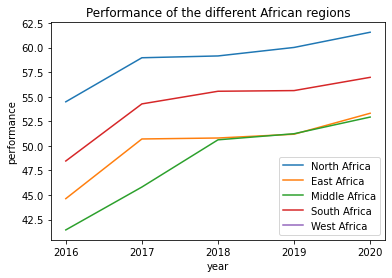

In [51]:
f, ax = plt.subplots(1, 1)
plt.plot("ds", "score", data=north_af_df, label="North Africa")
plt.plot("ds", "score", data=east_af_df, label="East Africa")
plt.plot("ds", "score", data=mid_af_df, label="Middle Africa")
plt.plot("ds", "score", data=south_af_df, label="South Africa")
plt.plot("ds", "score", data=west_af_df, label="West Africa")
plt.title("Performance of the different African regions")
plt.xlabel("year")
plt.ylabel("performance")
ax.legend()

### America

Creating dataframe for __Latin America and Caribbean__

In [52]:
data_latcab_am = [['2016', df16[df16["region"] == "lat_cab"]["total_score"].median()], 
        ['2017', df17[df17["region"] == "lat_cab"]["total_score"].median()], 
        ['2018', df18[df18["region"] == "lat_cab"]["total_score"].median()], 
        ['2019', df19[df19["region"] == "lat_cab"]["total_score"].median()], 
        ['2020', df20[df20["region"] == "lat_cab"]["total_score"].median()]]
latcab_df = pd.DataFrame(data_latcab_am, columns = ['ds', 'score']) 

Creating dataframe for __North America__

In [53]:
data_north_am = [['2016', df16[df16["region"] == "north_am"]["total_score"].median()], 
        ['2017', df17[df17["region"] == "north_am"]["total_score"].median()], 
        ['2018', df18[df18["region"] == "north_am"]["total_score"].median()], 
        ['2019', df19[df19["region"] == "north_am"]["total_score"].median()], 
        ['2020', df20[df20["region"] == "north_am"]["total_score"].median()]]
north_am_df = pd.DataFrame(data_north_am, columns = ['ds', 'score']) 

Plotting the __performance of America__

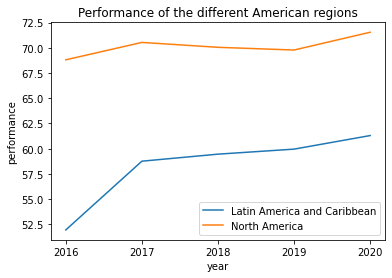

In [54]:
f, ax = plt.subplots(1, 1)
plt.plot("ds", "score", data=latcab_df, label="Latin America and Caribbean")
plt.plot("ds", "score", data=north_am_df, label="North America")
plt.title("Performance of the different American regions")
plt.xlabel("year")
plt.ylabel("performance")
ax.legend();

### Asia

Creating dataframe for __Center Asia__

In [55]:
data_cent_as = [['2016', df16[df16["region"] == "cent_as"]["total_score"].median()], 
        ['2017', df17[df17["region"] == "cent_as"]["total_score"].median()], 
        ['2018', df18[df18["region"] == "cent_as"]["total_score"].median()], 
        ['2019', df19[df19["region"] == "cent_as"]["total_score"].median()], 
        ['2020', df20[df20["region"] == "cent_as"]["total_score"].median()]]
cent_as_df = pd.DataFrame(data_cent_as, columns = ['ds', 'score']) 

Creating dataframe for __East Asia__

In [56]:
data_east_as = [['2016', df16[df16["region"] == "east_as"]["total_score"].median()], 
        ['2017', df17[df17["region"] == "east_as"]["total_score"].median()], 
        ['2018', df18[df18["region"] == "east_as"]["total_score"].median()], 
        ['2019', df19[df19["region"] == "east_as"]["total_score"].median()], 
        ['2020', df20[df20["region"] == "east_as"]["total_score"].median()]]
east_as_df = pd.DataFrame(data_east_as, columns = ['ds', 'score']) 

Creating dataframe for __Southeast Asia__

In [57]:
data_southeast_as = [['2016', df16[df16["region"] == "southeast_as"]["total_score"].median()], 
        ['2017', df17[df17["region"] == "southeast_as"]["total_score"].median()], 
        ['2018', df18[df18["region"] == "southeast_as"]["total_score"].median()], 
        ['2019', df19[df19["region"] == "southeast_as"]["total_score"].median()], 
        ['2020', df20[df20["region"] == "southeast_as"]["total_score"].median()]]
southeast_as_df = pd.DataFrame(data_southeast_as, columns = ['ds', 'score']) 

Creating dataframe for __South Asia__

In [58]:
data_south_as = [['2016', df16[df16["region"] == "south_as"]["total_score"].median()], 
        ['2017', df17[df17["region"] == "south_as"]["total_score"].median()], 
        ['2018', df18[df18["region"] == "south_as"]["total_score"].median()], 
        ['2019', df19[df19["region"] == "south_as"]["total_score"].median()], 
        ['2020', df20[df20["region"] == "south_as"]["total_score"].median()]]
south_as_df = pd.DataFrame(data_south_as, columns = ['ds', 'score']) 

Creating dataframe for __West Asia__

In [59]:
data_west_as = [['2016', df16[df16["region"] == "west_as"]["total_score"].median()], 
        ['2017', df17[df17["region"] == "west_as"]["total_score"].median()], 
        ['2018', df18[df18["region"] == "west_as"]["total_score"].median()], 
        ['2019', df19[df19["region"] == "west_as"]["total_score"].median()], 
        ['2020', df20[df20["region"] == "west_as"]["total_score"].median()]]
west_as_df = pd.DataFrame(data_west_as, columns = ['ds', 'score']) 

Plotting __Asia's performance__ by region

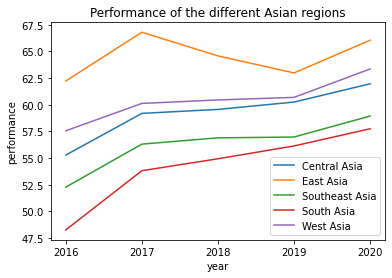

In [60]:
f, ax = plt.subplots(1, 1)
plt.plot("ds", "score", data=cent_as_df, label="Central Asia")
plt.plot("ds", "score", data=east_as_df, label="East Asia")
plt.plot("ds", "score", data=southeast_as_df, label="Southeast Asia")
plt.plot("ds", "score", data=south_as_df, label="South Asia")
plt.plot("ds", "score", data=west_as_df, label="West Asia")
plt.title("Performance of the different Asian regions")
plt.xlabel("year")
plt.ylabel("performance")
ax.legend()

### Europe

Creating dataframe for __Eastern Europe__

In [61]:
data_east_eu = [['2016', df16[df16["region"] == "east_eu"]["total_score"].median()], 
        ['2017', df17[df17["region"] == "east_eu"]["total_score"].median()], 
        ['2018', df18[df18["region"] == "east_eu"]["total_score"].median()], 
        ['2019', df19[df19["region"] == "east_eu"]["total_score"].median()], 
        ['2020', df20[df20["region"] == "east_eu"]["total_score"].median()]]
east_eu_df = pd.DataFrame(data_east_eu, columns = ['ds', 'score']) 

Creating dataframe for __Northern Europe__

In [62]:
data_north_eu = [['2016', df16[df16["region"] == "nor_eu"]["total_score"].median()], 
        ['2017', df17[df17["region"] == "nor_eu"]["total_score"].median()], 
        ['2018', df18[df18["region"] == "nor_eu"]["total_score"].median()], 
        ['2019', df19[df19["region"] == "nor_eu"]["total_score"].median()], 
        ['2020', df20[df20["region"] == "nor_eu"]["total_score"].median()]]
nor_eu_df = pd.DataFrame(data_north_eu, columns = ['ds', 'score']) 

Creating dataframe for __South Europe__

In [63]:
data_south_eu = [['2016', df16[df16["region"] == "sou_eu"]["total_score"].median()], 
        ['2017', df17[df17["region"] == "sou_eu"]["total_score"].median()], 
        ['2018', df18[df18["region"] == "sou_eu"]["total_score"].median()], 
        ['2019', df19[df19["region"] == "sou_eu"]["total_score"].median()], 
        ['2020', df20[df20["region"] == "sou_eu"]["total_score"].median()]]
sou_eu_df = pd.DataFrame(data_south_eu, columns = ['ds', 'score'])

Creating dataframe for __Western Europe__

In [64]:
data_west_eu = [['2016', df16[df16["region"] == "wes_eu"]["total_score"].median()], 
        ['2017', df17[df17["region"] == "wes_eu"]["total_score"].median()], 
        ['2018', df18[df18["region"] == "wes_eu"]["total_score"].median()], 
        ['2019', df19[df19["region"] == "wes_eu"]["total_score"].median()], 
        ['2020', df20[df20["region"] == "wes_eu"]["total_score"].median()]]
west_eu_df = pd.DataFrame(data_west_eu, columns = ['ds', 'score']) 

Plotting the __European performance by subregion__

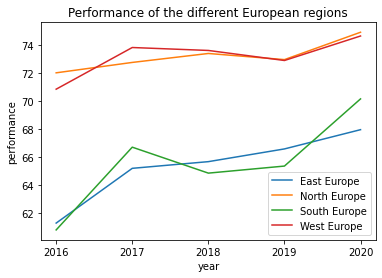

In [65]:
f, ax = plt.subplots(1, 1)
plt.plot("ds", "score", data=east_eu_df, label="East Europe")
plt.plot("ds", "score", data=nor_eu_df, label="North Europe")
plt.plot("ds", "score", data=sou_eu_df, label="South Europe")
plt.plot("ds", "score", data=west_eu_df, label="West Europe")
plt.title("Performance of the different European regions")
plt.xlabel("year")
plt.ylabel("performance")
ax.legend();

Creating dataframe for __Oceania__

In [66]:
data_oceania = [['2016', df16[df16["region"] == "oceania"]["total_score"].median()], 
        ['2017', df17[df17["region"] == "oceania"]["total_score"].median()], 
        ['2018', df18[df18["region"] == "oceania"]["total_score"].median()], 
        ['2019', df19[df19["region"] == "oceania"]["total_score"].median()], 
        ['2020', df20[df20["region"] == "oceania"]["total_score"].median()]]
oceania_df = pd.DataFrame(data_oceania, columns = ['ds', 'score']) 

## Global achievement per goal - 2020

In [67]:
data_global_sdg = [['sdg1', df20["sdg1_score"].median()], 
        ['sdg2', df20["sdg2_score"].median()], 
        ['sdg3', df20["sdg3_score"].median()], 
        ['sdg4', df20["sdg4_score"].median()], 
        ['sdg5', df20["sdg5_score"].median()],
        ['sdg6', df20["sdg6_score"].median()], 
        ['sdg7', df20["sdg7_score"].median()], 
        ['sdg8', df20["sdg8_score"].median()], 
        ['sdg9', df20["sdg9_score"].median()],
        ['sdg10', df20["sdg10_score"].median()], 
        ['sdg11', df20["sdg11_score"].median()], 
        ['sdg12', df20["sdg12_score"].median()], 
        ['sdg13', df20["sdg13_score"].median()],
        ['sdg14', df20["sdg14_score"].median()], 
        ['sdg15', df20["sdg15_score"].median()], 
        ['sdg16', df20["sdg16_score"].median()], 
        ['sdg17', df20["sdg17_score"].median()]]
sdg_global_df = pd.DataFrame(data_global_sdg, columns = ['sdg', 'performance']).sort_values("performance")

Text(0, 0.5, 'goal')

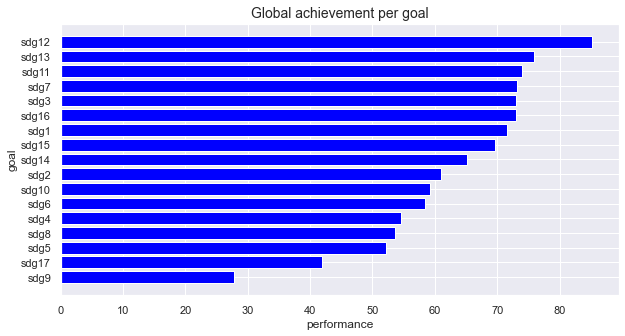

In [88]:
f, ax = plt.subplots(1, 1)
plt.barh("sdg", "performance", data=sdg_global_df, color="blue")
plt.title("Global achievement per goal", fontsize = 14)
plt.xlabel("performance")
plt.ylabel("goal")

# Forecasting model

In [69]:
from fbprophet import Prophet

In [70]:
# Global prediction
m = Prophet(seasonality_mode='additive', yearly_seasonality=True, interval_width=0.8, 
            n_changepoints=2, weekly_seasonality=False, daily_seasonality=False)
m.fit(global_df)
future = m.make_future_dataframe(periods=10, freq="Y")

fcst = m.predict(future)
fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-01,54.772961,54.772961,54.772961
1,2017-01-01,59.382408,59.382408,59.382408
2,2018-01-01,59.228779,59.228779,59.228779
3,2019-01-01,59.546029,59.546029,59.546029
4,2020-01-01,61.425798,61.425798,61.425798
5,2020-12-31,63.909611,63.749673,64.055068
6,2021-12-31,67.000259,66.229617,67.759440
7,2022-12-31,70.699484,69.142315,72.253890
8,2023-12-31,75.007987,72.385553,77.503601
9,2024-12-31,73.202708,69.304097,76.737492


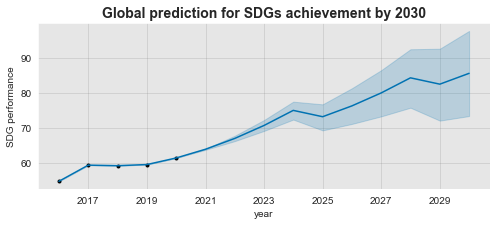

In [71]:
# Plotting the forescasting model
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
fig = m.plot(fcst, figsize=(7,3), ylabel="SDG performance", xlabel="year")
plt.title("Global prediction for SDGs achievement by 2030", fontsize=14, fontweight="bold")
plt.show()

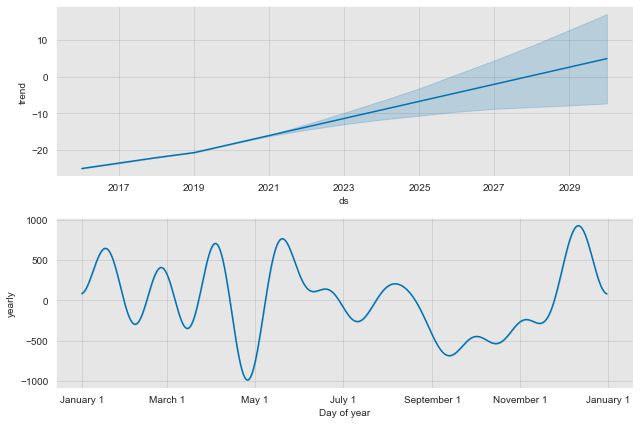

In [72]:
fig2 = m.plot_components(fcst)

### Validating the model with the first 3 years

In [75]:
global_df_test = global_df.loc[0:2].copy() # Creating a subset of the df

#Initializing the model and making predictions
m = Prophet(seasonality_mode='additive', yearly_seasonality=True, interval_width=0.95)
m.fit(global_df_test)
future = m.make_future_dataframe(periods=2, freq="Y")

fcst_test = m.predict(future)
fcst_test[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.


,ds,yhat,yhat_lower,yhat_upper
0,2016-01-01,54.772961,54.772961,54.772961
1,2017-01-01,59.382408,59.382408,59.382408
2,2018-01-01,59.228779,59.228778,59.228779
3,2018-12-31,55.164824,55.164824,55.164825
4,2019-12-31,55.567965,55.567964,55.567966


In [77]:
# Placing the information in a df
y_col = global_df["y"]
fcst_test["y"] = y_col
fcst_test = fcst_test.loc[:, ["ds", "y", "trend", "yhat", "yhat_upper", "yhat_lower"]]

In [78]:
print("MAE yhat\t: {}\nMAE trend\t: {}\nMAE yhat_lower: {}\nMAE yhat_upper: {}".format(
    mean_absolute_error(fcst_test['y'].values,fcst_test['yhat']),
    mean_absolute_error(fcst_test['y'].values,fcst_test['trend']),
    mean_absolute_error(fcst_test['y'].values,fcst_test['yhat_lower']),
    mean_absolute_error(fcst_test['y'].values,fcst_test['yhat_upper'])))

MAE yhat	: 2.0478074997695956
MAE trend	: 56.41039502157789
MAE yhat_lower: 2.047807805886248
MAE yhat_upper: 2.0478072572510344


In [79]:
print("RMSE yhat\t: {}\nRMSE trend\t: {}\nRMSE yhat_lower: {}\nRMSE yhat_upper: {}".format(
    mean_squared_error(fcst_test['y'].values,fcst_test['yhat']),
    mean_squared_error(fcst_test['y'].values,fcst_test['trend']),
    mean_squared_error(fcst_test['y'].values,fcst_test['yhat_lower']),
    mean_squared_error(fcst_test['y'].values,fcst_test['yhat_upper'])))

RMSE yhat	: 10.701831736757896
RMSE trend	: 3183.4916252521584
RMSE yhat_lower: 10.701834993746228
RMSE yhat_upper: 10.701828977488523


### Validating the model with the first 4 years

In [82]:
global_df_test4 = global_df.loc[0:3].copy() #Creating subset of the df

# Initializing the model and making predictions
m = Prophet(seasonality_mode='additive', yearly_seasonality=True, interval_width=0.95)
m.fit(global_df_test4)
future = m.make_future_dataframe(periods=11, freq="Y")

fcst_test_val4 = m.predict(future)
fcst_test_val4[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.


,ds,yhat,yhat_lower,yhat_upper
0,2016-01-01,54.772961,54.772961,54.772961
1,2017-01-01,59.382408,59.382408,59.382408
2,2018-01-01,59.228779,59.228778,59.228779
3,2019-01-01,59.546029,59.546029,59.546029
4,2019-12-31,58.384885,58.201536,58.580557
5,2020-12-31,60.806215,60.303228,61.310462
6,2021-12-31,61.741992,60.793495,62.640124
7,2022-12-31,62.875815,61.382180,64.291548
8,2023-12-31,64.202669,62.091935,66.245286
9,2024-12-31,66.623998,63.795733,69.336835


In [83]:
# Creating df to plot both predictions
yhat_pred = fcst["yhat"]
yhat_test3 = fcst_test_val["yhat"]
yhat_test4 = fcst_test_val4["yhat"]
ds = fcst["ds"]
val_df = pd.concat([ds, yhat_pred, yhat_test3, yhat_test4], axis=1)
val_df.columns = ["ds", "yhat_pred", "yhat_test3", "yhat_test4"]

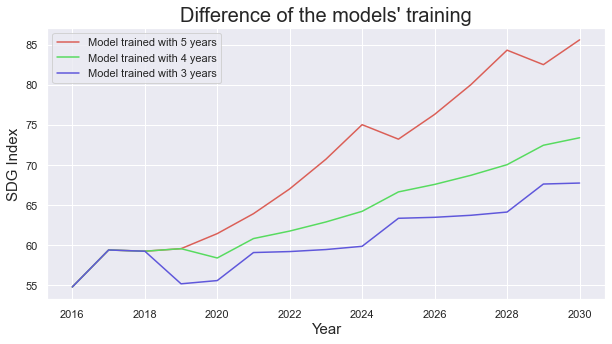

In [85]:
# Plotting the difference
sns.set(rc={'figure.figsize':(10,5)})
sns.set_palette("hls", n_colors=3)
labels=["Model trained with 5 years", "Model trained with 4 years", "Model trained with 3 years"]
sns.lineplot(x = "ds", y = "yhat_pred", data = val_df, 
            dashes = False, markers = ["o", "<"],  legend="brief",)
sns.lineplot(x = "ds", y = "yhat_test4", data = val_df, dashes = False, 
            markers = ["o", "<"],  legend="brief")
sns.lineplot(x = "ds", y = "yhat_test3", data = val_df)
plt.title("Difference of the models' training", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("SDG Index", fontsize = 15)
plt.legend(labels)
plt.show()

In [86]:
msq = mean_squared_error(val_df['yhat_pred'].values,val_df['yhat_test4'])
print("Mean squared error is:", msq)

Mean squared error is: 61.71940315498848


In [87]:
mae = mean_absolute_error(val_df['yhat_pred'].values,val_df['yhat_test4'])
print("Mean absolute error is:", mae)

Mean absolute error is: 6.212425600678698
